In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Data cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
# Drop last 3 columns

In [14]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)

In [15]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.rename(columns={'v1':'Target','v2' : 'Text'},inplace=True)

In [17]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()

In [22]:
df['Target'] = encoder.fit_transform(df['Target'])

In [23]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
# Are there any missing values?

In [25]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [26]:
# Check for duplicated values?
df.duplicated().sum()

403

In [28]:
df= df.drop_duplicates(keep = 'first')

In [29]:
df.duplicated().sum()

0

In [30]:
df.shape

(5169, 2)

## EDA

<Axes: xlabel='Target'>

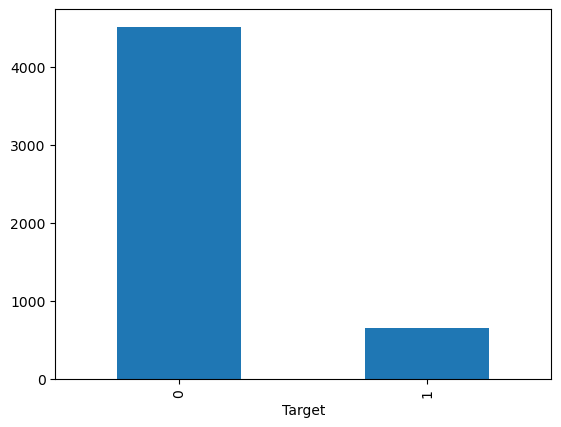

In [32]:
df['Target'].value_counts().plot(kind = 'bar')

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

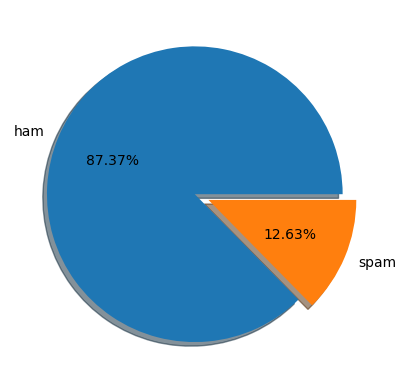

In [44]:
plt.pie(df['Target'].value_counts(),labels = ['ham','spam'],autopct = '%1.2f%%',explode = [0,0.1],shadow=0.5)
plt.show()

In [46]:
# Data is imbalanced

In [47]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [56]:
import nltk

In [59]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DESKTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DESKTOP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [60]:
df['num_characters'] = df['Text'].apply(len)

In [61]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [64]:
# num of words
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [65]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [68]:
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [69]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [71]:
df.describe()[['num_characters','num_words'	,'num_sentences']]

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [73]:
df[df['Target'] == 0][['num_characters','num_words'	,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [74]:
df[df['Target'] == 1][['num_characters','num_words'	,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [75]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

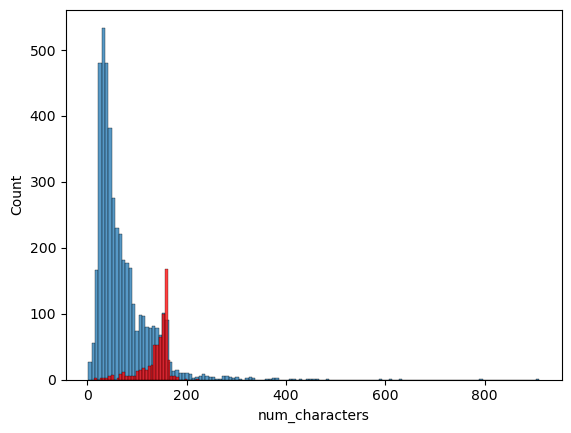

In [77]:
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

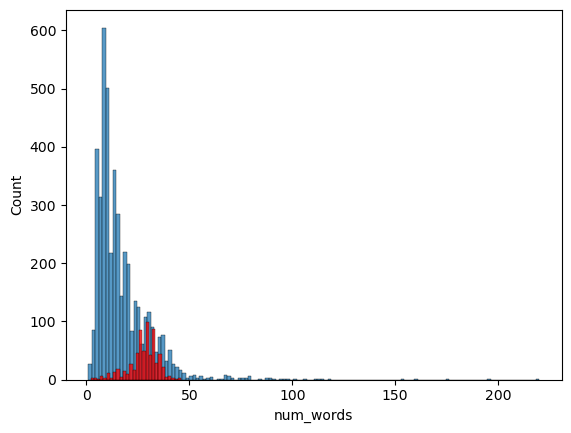

In [78]:
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')

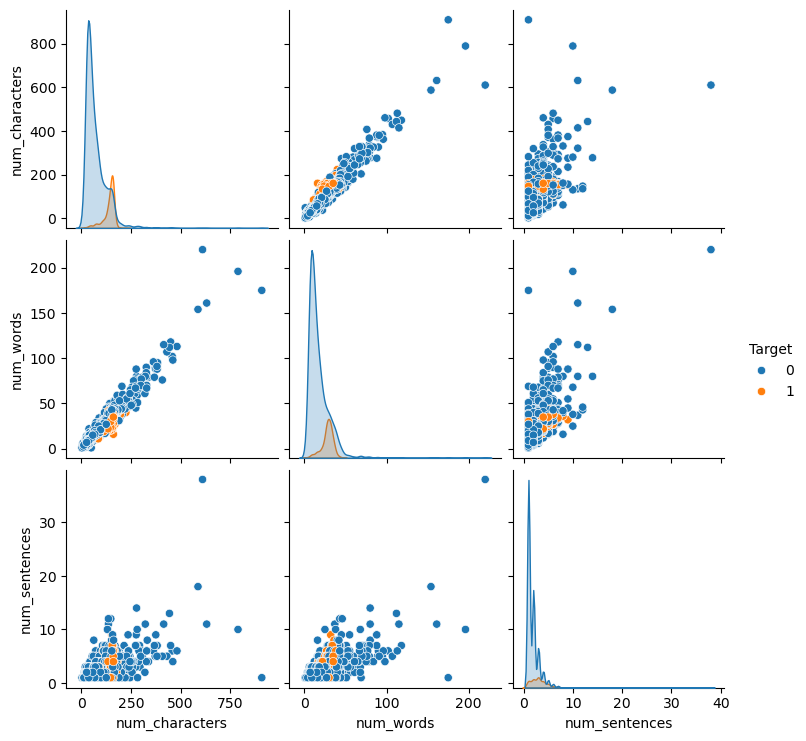

In [79]:
sns.pairplot(df,hue='Target')

<Axes: >

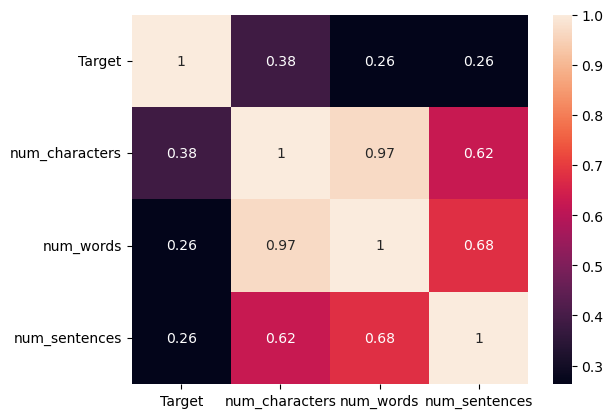

In [80]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [90]:
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DESKTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
from nltk.stem.porter import PorterStemmer

In [97]:
ps = PorterStemmer()

In [98]:
ps.stem('Danced')

'danc'

## Data Preprocessing

In [99]:
def text_tokenization(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    li = []
    for i in text:
        if i.isalnum():
            li.append(i)
    text = li[:]
    li.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            li.append(i)
    text = li[:]
    li.clear()
    ps = PorterStemmer()
    for i in text:
        li.append(ps.stem(i))
    return " ".join(li)

In [100]:
text_tokenization('i loved The youtube Lectures on Machine learning. How about you?')

'love youtub lectur machin learn'

In [89]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [102]:
df['Text_transformation'] = df['Text'].apply(text_tokenization)

In [103]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Text_transformation
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [106]:
from wordcloud import WordCloud

In [116]:
wc = WordCloud(width=500 ,height=500,min_font_size=10,background_color='white')

In [117]:
spam_wc = wc.generate(df[df['Target'] == 1]['Text_transformation'].str.cat(sep = " "))

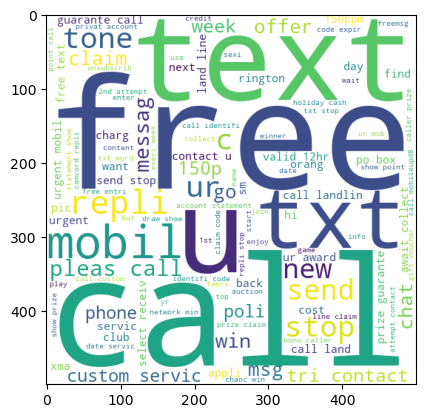

In [118]:
plt.imshow(spam_wc)

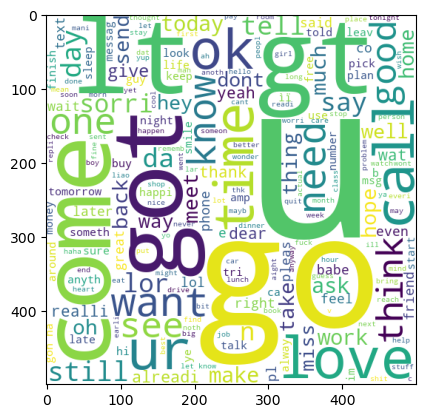

In [119]:
ham_wc = wc.generate(df[df['Target'] == 0]['Text_transformation'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [122]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Text_transformation'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [124]:
len(spam_corpus)

9939

In [125]:
from collections import Counter

In [127]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [136]:
counter_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

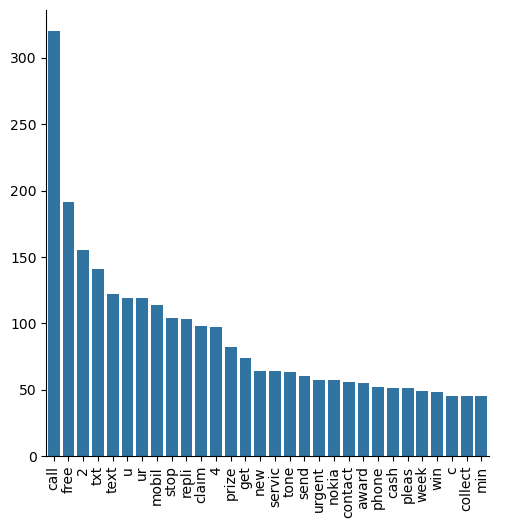

In [155]:
sns.catplot(x = counter_df[0].values,y = counter_df[1].values,data=counter_df,kind = 'bar')
plt.xticks(rotation = 'vertical')
plt.show()

In [156]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Text_transformation'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [157]:
len(ham_corpus)

35404

In [158]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [161]:
counter_df2 = pd.DataFrame(Counter(ham_corpus).most_common(30))

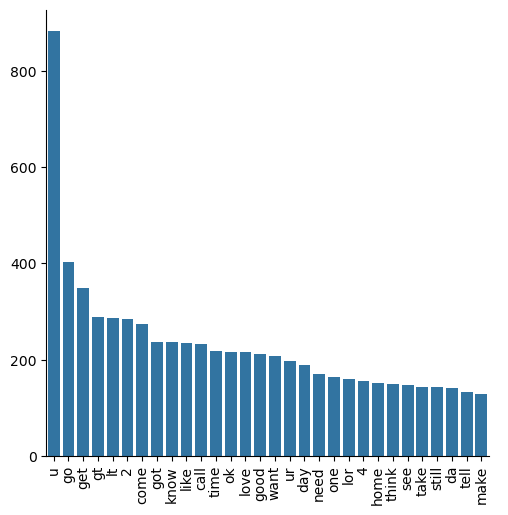

In [162]:
sns.catplot(x = counter_df2[0].values,y = counter_df2[1].values,data=counter_df2,kind = 'bar')
plt.xticks(rotation = 'vertical')
plt.show()

## Model building

In [183]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [199]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [200]:
X = tfidf.fit_transform(df['Text_transformation']).toarray()

In [201]:
X.shape

(5169, 3000)

In [202]:
y = df['Target'].values

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [205]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [206]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [207]:
gnb.fit(X_train,y_train)

GaussianNB()

In [208]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [209]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [210]:
y_pred1 = gnb.predict(X_test)

In [211]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [212]:
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [213]:
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [214]:
import pickle

In [215]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))